In [61]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [62]:
import sqlite3

connection = sqlite3.connect("../db.sqlite3")

data = pd.read_sql_query("SELECT * FROM restaurant_order "
         "INNER JOIN restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id "
         "INNER JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id;", connection)

data.to_csv("data.csv", index=False)

connection.close()

df = pd.read_csv("data.csv")
df


,id,datetime,id.1,quantity,order_id,product_id,id.2,price,name
0,1,2019-08-03 20:25:00,1,2,1,6,6,0.80,Plain Papadum
1,1,2019-08-03 20:25:00,2,1,1,240,240,12.95,King Prawn Balti
2,1,2019-08-03 20:25:00,3,1,1,19,19,2.95,Garlic Naan
3,1,2019-08-03 20:25:00,4,1,1,36,36,3.95,Mushroom Rice
4,1,2019-08-03 20:25:00,5,1,1,111,111,8.95,Paneer Tikka Masala
...,...,...,...,...,...,...,...,...,...
74813,3255,2016-05-18 18:53:00,74814,2,3255,247,247,17.95,House Red wine 75cl
74814,12905,2016-05-14 19:28:00,74815,2,12905,247,247,17.95,House Red wine 75cl
74815,3272,2016-05-10 13:18:00,74816,2,3272,247,247,17.95,House Red wine 75cl
74816,11404,2016-04-07 19:04:00,74817,1,11404,248,248,17.95,House white wine 75cl


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

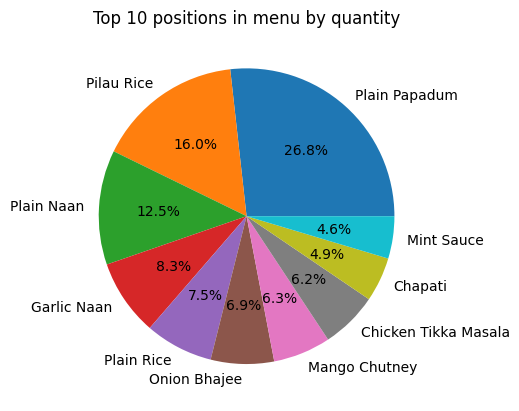

In [63]:
import matplotlib.pyplot as plt

quantities = df.groupby("name")["quantity"].sum()
top10_prod = quantities.nlargest(10)

plt.pie(top10_prod, labels=top10_prod.index, autopct="%1.1f%%", startangle=0)
plt.title("Top 10 positions in menu by quantity")
plt.show()


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

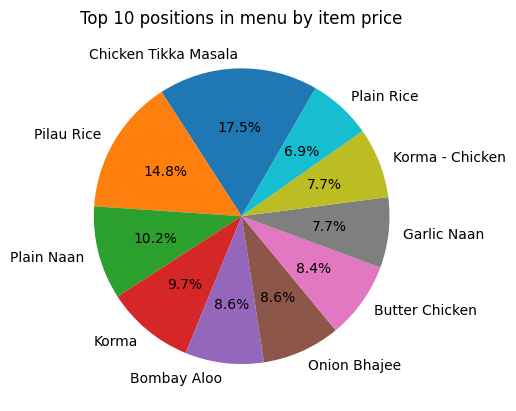

In [64]:
df["item_price"] = df["price"] * df["quantity"]
products_price = df.groupby("name")["item_price"].sum()
top10_by_price = products_price.nlargest(10)

plt.pie(top10_by_price, labels=top10_by_price.index, autopct="%1.1f%%", startangle=60)
plt.title("Top 10 positions in menu by item price")
plt.show()


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

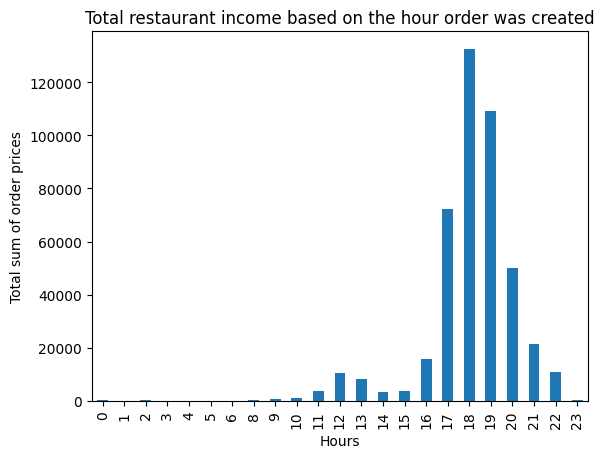

In [65]:
from datetime import datetime as dt

df["datetime"] = pd.to_datetime(df["datetime"])
df["hour"] = df["datetime"].dt.hour

df.groupby("hour")["item_price"].sum().plot.bar()
plt.title("Total restaurant income based on the hour order was created")
plt.xlabel("Hours")
plt.ylabel("Total sum of order prices")
plt.show()


# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

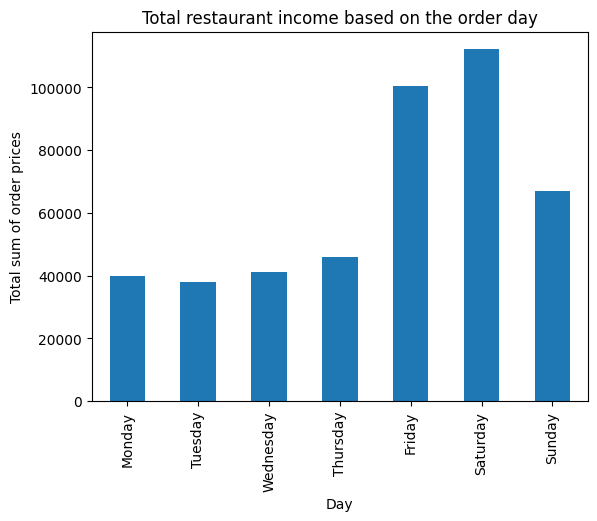

In [66]:
df["day"] = df["datetime"].dt.day_name()
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df.groupby("day")["item_price"].sum().reindex(week).plot.bar()
plt.title("Total restaurant income based on the order day")
plt.xlabel("Day")
plt.ylabel("Total sum of order prices")
plt.show()
